In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

import plotly.graph_objects as go 
import plotly.io as pio 
import plotly.colors as colors


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Set the maximum number of columns to display
pd.options.display.max_columns = None
# Set the maximum number of rows to display
pd.options.display.max_rows = 10

plt.rc("figure", figsize=(22, 8))

pd.set_option('display.max_rows', 100) 

In [69]:
list_company = ['Audi', 'BMW', 'Honda', 'Lucid Motors', 'NIO', 'Nissan', 'Rolls Royces', 'Tata', 'Tesla', 'Volkswagen']
le = LabelEncoder()

list_company_le = le.fit_transform(list_company)
list_company_le

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [70]:
for i, company in enumerate(range(0, len(list_company_le), 1)):
    print(i, ":", le.inverse_transform([company]))

0 : ['Audi']
1 : ['BMW']
2 : ['Honda']
3 : ['Lucid Motors']
4 : ['NIO']
5 : ['Nissan']
6 : ['Rolls Royces']
7 : ['Tata']
8 : ['Tesla']
9 : ['Volkswagen']


In [71]:
num = 8 #Tesla
company = le.inverse_transform([num])[0]
company

'Tesla'

In [72]:
path = f'./Data/{company}/{company.lower()}.csv'
data = pd.read_csv(path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-24,45.410000,45.430000,44.444000,44.523998,44.523998,12853500
1,2016-08-25,44.622002,44.759998,44.153999,44.192001,44.192001,8812500
2,2016-08-26,44.428001,44.571999,43.764000,43.998001,43.998001,11195000
3,2016-08-29,44.029999,44.080002,43.000000,43.040001,43.040001,16331500
4,2016-08-30,43.222000,43.222000,42.104000,42.268002,42.268002,15844500


In [73]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,186.314442,190.364909,181.921613,186.397424,186.397424,4.444589e+07
std,230.355300,235.250447,224.799554,230.373307,230.373307,3.032238e+07
min,36.220001,36.945999,35.397999,35.793999,35.793999,8.812500e+06
25%,55.410999,56.141502,54.534500,55.318001,55.318001,2.478255e+07
50%,66.950001,68.244000,65.725998,66.957000,66.957000,3.498150e+07
75%,171.459503,176.469002,166.700001,172.577003,172.577003,5.211238e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [75]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [76]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-24,45.410000,45.430000,44.444000,44.523998,44.523998,12853500
2016-08-25,44.622002,44.759998,44.153999,44.192001,44.192001,8812500
2016-08-26,44.428001,44.571999,43.764000,43.998001,43.998001,11195000
2016-08-29,44.029999,44.080002,43.000000,43.040001,43.040001,16331500
2016-08-30,43.222000,43.222000,42.104000,42.268002,42.268002,15844500
...,...,...,...,...,...,...
2021-08-17,672.659973,674.580017,648.840027,665.710022,665.710022,23721300
2021-08-18,669.750000,695.770020,669.349976,688.989990,688.989990,20349400
2021-08-19,678.210022,686.549988,667.590027,673.469971,673.469971,14313500


## Feature Engineering


In [77]:
# 1. Daily Return
data['Daily_Return'] = (data['Close'] - data['Open']) / data['Open'] * 100

# 2. High-Low Spread (Volatility)
data['High_Low_Spread'] = (data['High'] - data['Low']) / data['Low'] * 100

In [78]:
# Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()  # 20-day moving average
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average

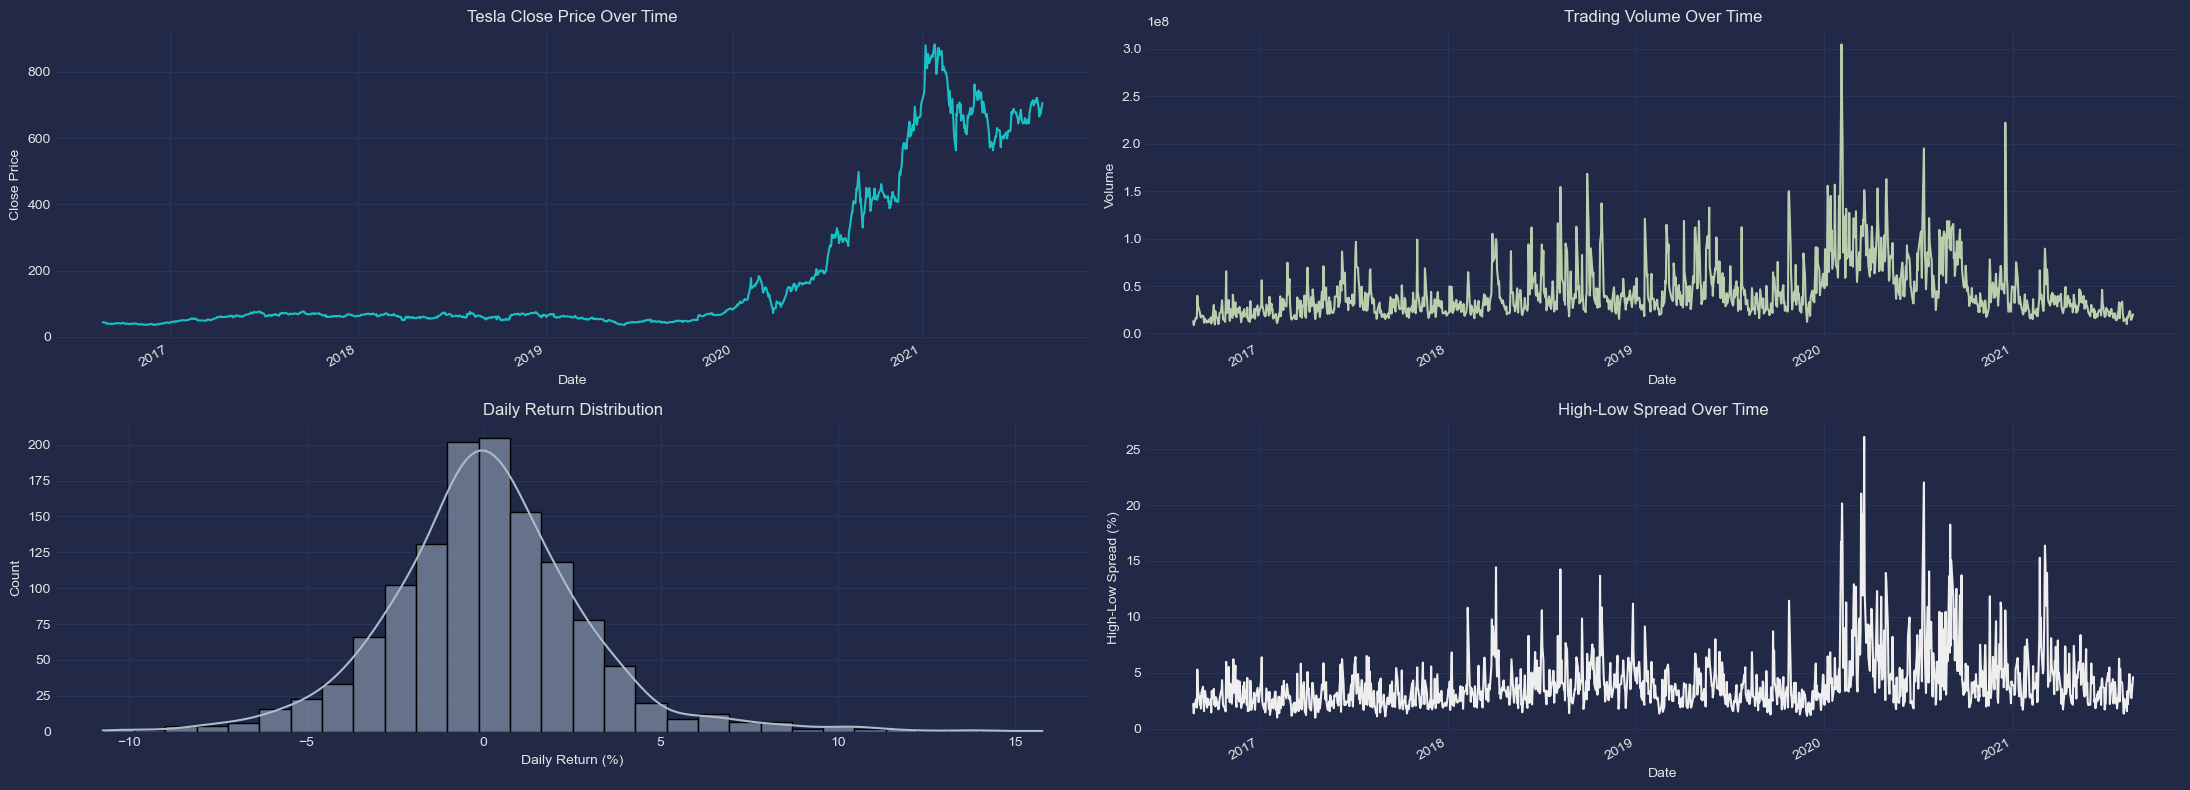

In [79]:
# Time Series Analysis: Close Price
plt.subplot(2, 2, 1)
data['Close'].plot(title='Tesla Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Volume Over Time
plt.subplot(2, 2, 2)
data['Volume'].plot(title='Trading Volume Over Time', color='#bacead')
plt.xlabel('Date')
plt.ylabel('Volume')

# Distribution Analysis: Daily Return
plt.subplot(2, 2, 3)
sns.histplot(data['Daily_Return'], kde=True, bins=30, color='#abce')
plt.title('Daily Return Distribution')
plt.xlabel('Daily Return (%)')

# Volatility Analysis: High-Low Spread
plt.subplot(2, 2, 4)
data['High_Low_Spread'].plot(title='High-Low Spread Over Time', color='#eee')
plt.xlabel('Date')
plt.ylabel('High-Low Spread (%)')

plt.tight_layout()
plt.show()

1. **Tesla Close Price Over Time**:

   - The chart shows Tesla's `Close` price from 2016 to 2021, with a significant upward trend starting around 2020, indicating strong growth linked to increased interest in Tesla and the electric vehicle industry. Prior to this, the stock price remained relatively stable from 2016 to late 2019.

2. **Trading Volume Over Time**:

   - Trading volume experienced spikes, especially around 2020, corresponding with the stock price increase. These spikes suggest heightened trading activity due to news or major announcements and can reflect strong investor interest affecting the stock's direction.

3. **Daily Return Distribution**:

   - The `Daily Return` histogram resembles a normal distribution, with most returns close to 0%. This indicates that daily returns are typically small, although there are occasional days with significant positive or negative returns, reflecting volatility.

4. **High-Low Spread Over Time**:
   - The high-low spread indicates daily price volatility, showing how much the stock's price fluctuated each day. Spikes in this metric often coincide with increased trading volume and rising stock prices, suggesting times of significant market reactions.


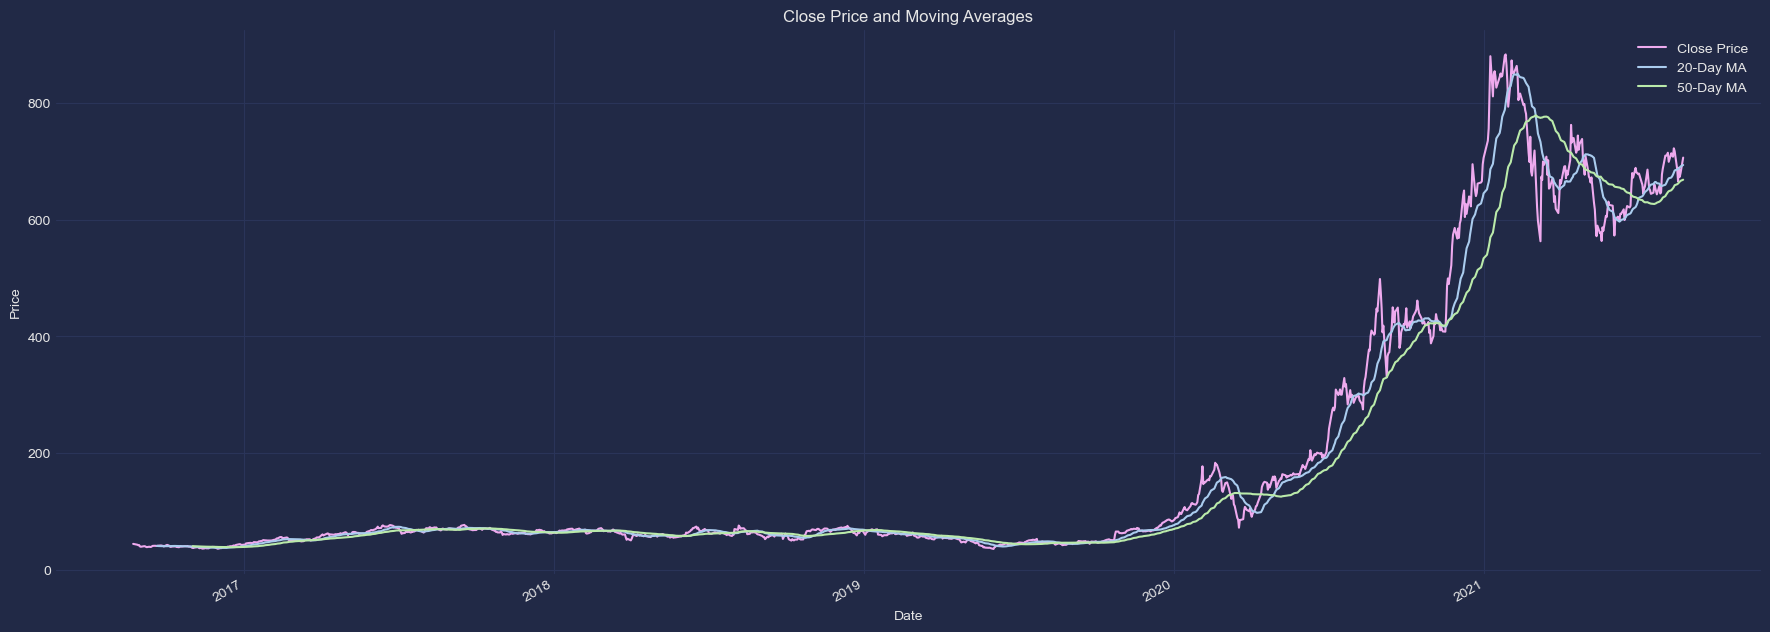

In [80]:
data['Close'].plot(label='Close Price', color='#eae')
data['MA20'].plot(label='20-Day MA', color='#ace')
data['MA50'].plot(label='50-Day MA', color='#baeaaa')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

- The price is generally going up over time.
- There are times when the price goes down a little before continuing to go up.
- The 20-day and 50-day moving averages are also going up, which suggests that the overall trend is positive.


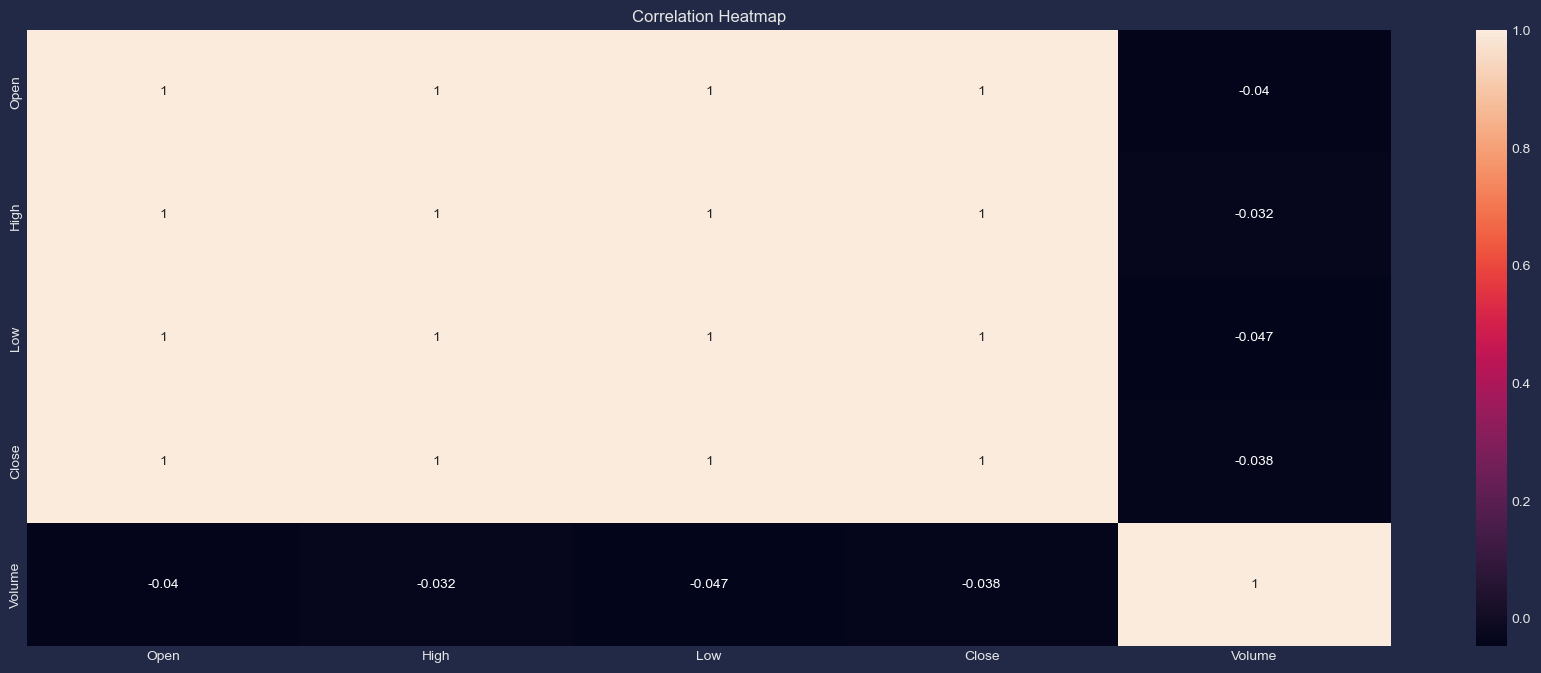

In [81]:
# Correlation Analysis
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

- Open, High, Low, Close are highly correlated.
- Volume has a very low correlation with the other variables.


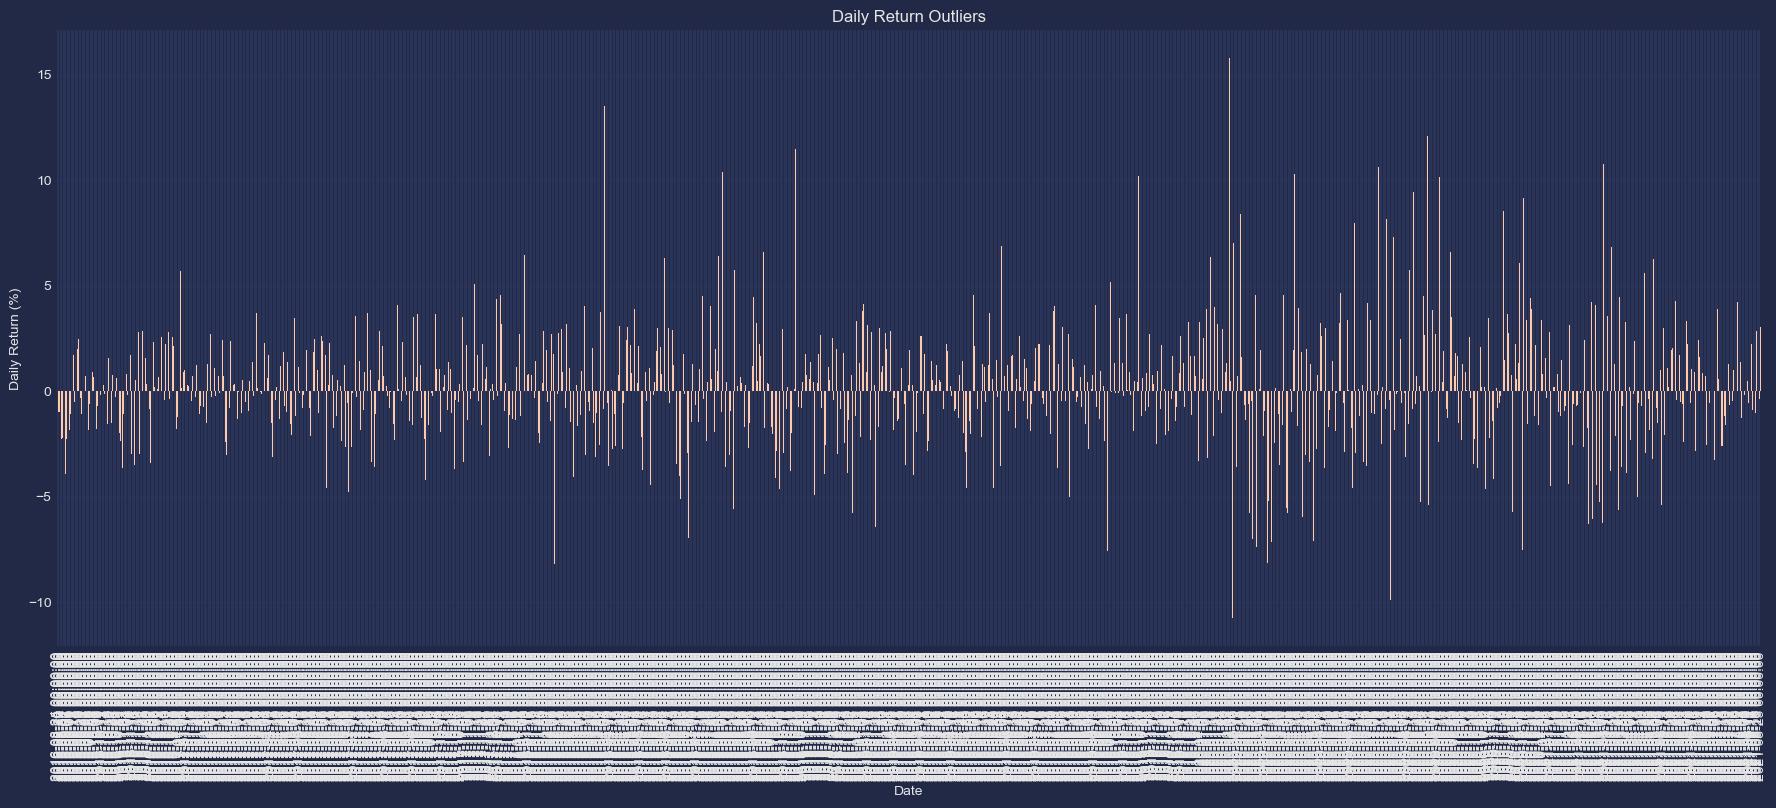

In [82]:
# Anomaly Detection: Daily Return Outliers
data['Daily_Return'].plot(kind='bar', color='#ffcaaa')
plt.title('Daily Return Outliers')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

In [83]:
# Seasonality and Trend Analysis: Resample Monthly and Yearly
monthly_data = data['Close'].resample('M').mean()
yearly_data = data['Close'].resample('Y').mean()

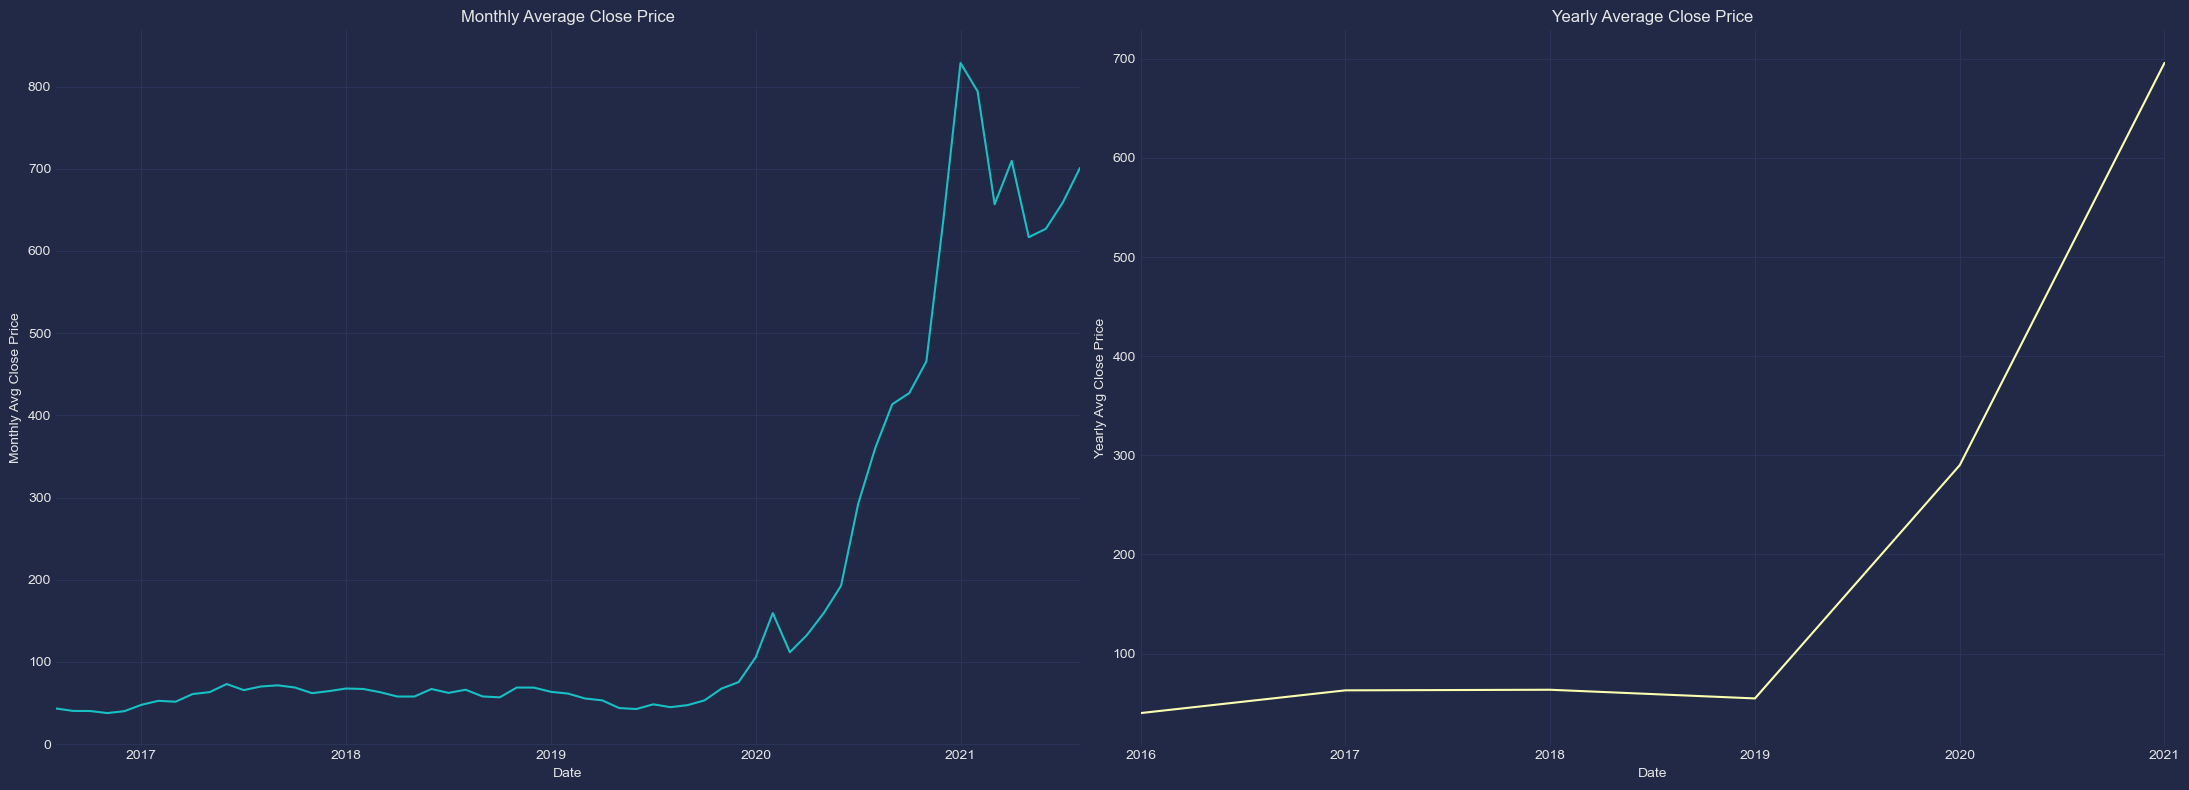

In [84]:
# Monthly Trend
plt.subplot(1, 2, 1)
monthly_data.plot(title='Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Monthly Avg Close Price')

# Yearly Trend
plt.subplot(1, 2, 2)
yearly_data.plot(title='Yearly Average Close Price', color='#fcffaf')
plt.xlabel('Date')
plt.ylabel('Yearly Avg Close Price')

plt.tight_layout()
plt.show()

The left chart shows the monthly average closing price of an asset over time. It has a general upward trend, with some fluctuations. The right chart shows the yearly average closing price of the same asset. It also shows an upward trend, but less volatile than the monthly chart.


In [85]:
data

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,High_Low_Spread,MA20,MA50
Date,,,,,,,,,,
2016-08-24,45.410000,45.430000,44.444000,44.523998,44.523998,12853500,-1.951116,2.218522,NaN,NaN
2016-08-25,44.622002,44.759998,44.153999,44.192001,44.192001,8812500,-0.963652,1.372467,NaN,NaN
2016-08-26,44.428001,44.571999,43.764000,43.998001,43.998001,11195000,-0.967858,1.846264,NaN,NaN
2016-08-29,44.029999,44.080002,43.000000,43.040001,43.040001,16331500,-2.248462,2.511633,NaN,NaN
2016-08-30,43.222000,43.222000,42.104000,42.268002,42.268002,15844500,-2.207205,2.655330,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-08-17,672.659973,674.580017,648.840027,665.710022,665.710022,23721300,-1.033204,3.967078,686.439496,661.898999
2021-08-18,669.750000,695.770020,669.349976,688.989990,688.989990,20349400,2.872712,3.947120,688.124496,663.606998
2021-08-19,678.210022,686.549988,667.590027,673.469971,673.469971,14313500,-0.698906,2.840061,689.334994,665.100797


In [86]:
# Sorting DataFrame
data.sort_values(by='Date', ascending=False, inplace=True)
data.reset_index(drop=True, inplace=True)
data.drop('Volume', axis=1, inplace=True)
data

,Open,High,Low,Close,Adj Close,Daily_Return,High_Low_Spread,MA20,MA50
0,685.442017,712.129883,680.750488,706.299988,706.299988,3.042996,4.609530,693.612994,668.431797
1,682.849976,692.130005,673.700012,680.260010,680.260010,-0.379288,2.735638,691.178995,666.503597
2,678.210022,686.549988,667.590027,673.469971,673.469971,-0.698906,2.840061,689.334994,665.100797
3,669.750000,695.770020,669.349976,688.989990,688.989990,2.872712,3.947120,688.124496,663.606998
4,672.659973,674.580017,648.840027,665.710022,665.710022,-1.033204,3.967078,686.439496,661.898999
...,...,...,...,...,...,...,...,...,...
1253,43.222000,43.222000,42.104000,42.268002,42.268002,-2.207205,2.655330,NaN,NaN
1254,44.029999,44.080002,43.000000,43.040001,43.040001,-2.248462,2.511633,NaN,NaN
1255,44.428001,44.571999,43.764000,43.998001,43.998001,-0.967858,1.846264,NaN,NaN
1256,44.622002,44.759998,44.153999,44.192001,44.192001,-0.963652,1.372467,NaN,NaN


## Model

In [88]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

path = f'./Data/{company}/{company.lower()}.csv'
data = pd.read_csv(path)
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Splitting the data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Prepare sequences
sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)


In [89]:
class StockPriceLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super(StockPriceLSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h_0 = torch.zeros(1, x.size(0), self.hidden_layer_size).requires_grad_()
        c_0 = torch.zeros(1, x.size(0), self.hidden_layer_size).requires_grad_()
        
        # We need to detach the hidden state to prevent exploding/vanishing gradients
        out, _ = self.lstm(x, (h_0.detach(), c_0.detach()))
        
        # Take the output from the last time step
        out = self.linear(out[:, -1, :])
        return out


In [90]:
# Model, Loss, and Optimizer
model = StockPriceLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training Loop
epochs = 100
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        # Forward pass
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_batch)
        
        # Compute the loss
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/100, Loss: 0.0024
Epoch 2/100, Loss: 0.0050
Epoch 3/100, Loss: 0.0019
Epoch 4/100, Loss: 0.0018
Epoch 5/100, Loss: 0.0025
Epoch 6/100, Loss: 0.0015
Epoch 7/100, Loss: 0.0014
Epoch 8/100, Loss: 0.0003
Epoch 9/100, Loss: 0.0004
Epoch 10/100, Loss: 0.0001
Epoch 11/100, Loss: 0.0001
Epoch 12/100, Loss: 0.0002
Epoch 13/100, Loss: 0.0000
Epoch 14/100, Loss: 0.0003
Epoch 15/100, Loss: 0.0002
Epoch 16/100, Loss: 0.0002
Epoch 17/100, Loss: 0.0001
Epoch 18/100, Loss: 0.0001
Epoch 19/100, Loss: 0.0001
Epoch 20/100, Loss: 0.0002
Epoch 21/100, Loss: 0.0001
Epoch 22/100, Loss: 0.0001
Epoch 23/100, Loss: 0.0002
Epoch 24/100, Loss: 0.0001
Epoch 25/100, Loss: 0.0001
Epoch 26/100, Loss: 0.0001
Epoch 27/100, Loss: 0.0000
Epoch 28/100, Loss: 0.0000
Epoch 29/100, Loss: 0.0001
Epoch 30/100, Loss: 0.0002
Epoch 31/100, Loss: 0.0002
Epoch 32/100, Loss: 0.0003
Epoch 33/100, Loss: 0.0001
Epoch 34/100, Loss: 0.0001
Epoch 35/100, Loss: 0.0001
Epoch 36/100, Loss: 0.0002
Epoch 37/100, Loss: 0.0001
Epoch 38/1

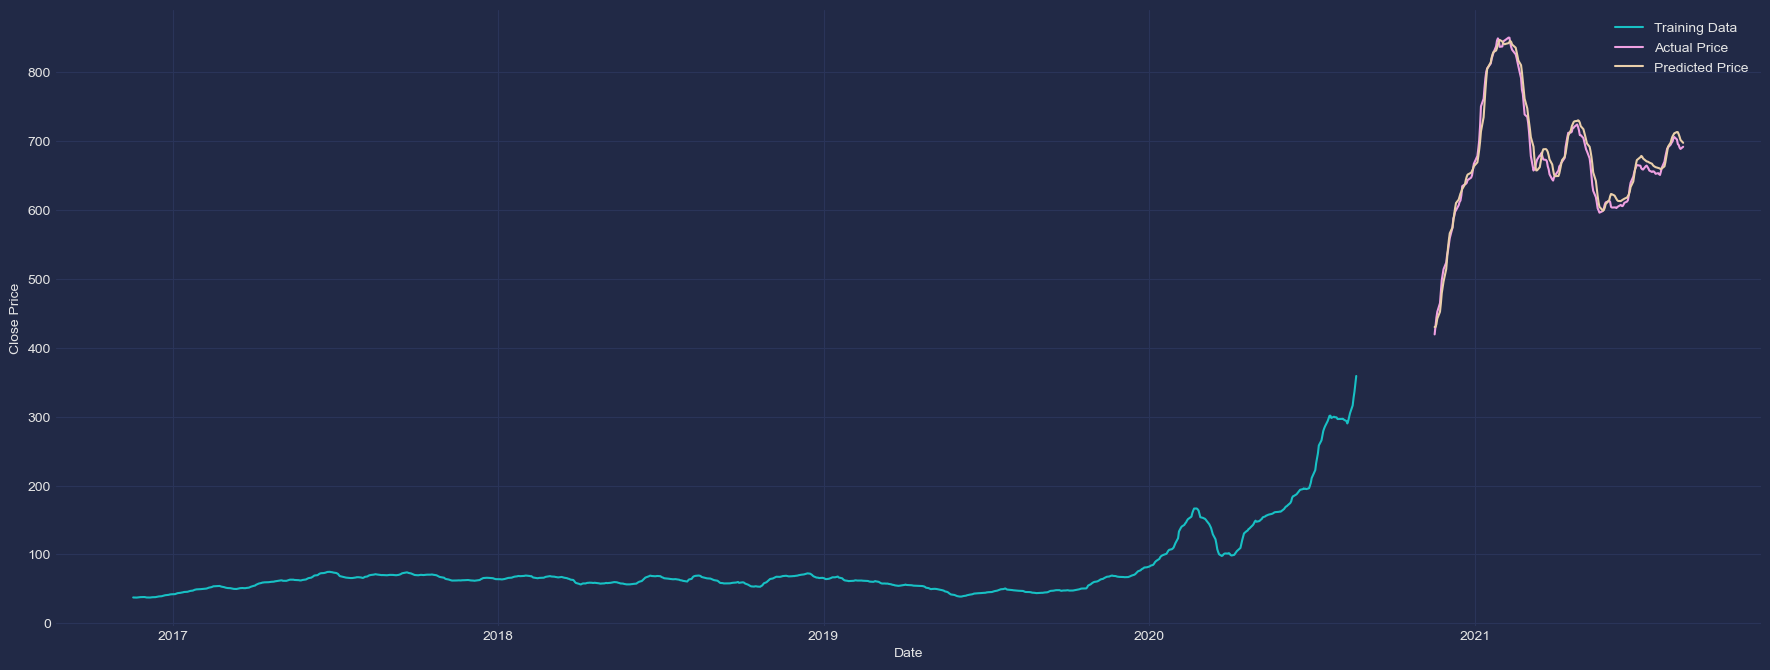

In [101]:
# Evaluate on test data
model.eval()
with torch.no_grad():
    predictions = model(X_test).detach().numpy()

# Rescale predictions back to original scale
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.unsqueeze(1).numpy())

# Ensure predictions and test data index match
train_plot_index = data.index[sequence_length:train_size]
test_plot_index = data.index[train_size + sequence_length:]

# Plot training data
plt.plot(train_plot_index, scaler.inverse_transform(train_data)[sequence_length:], label='Training Data')

# Plot actual prices
plt.plot(test_plot_index, y_test_rescaled, label='Actual Price',color='#faee')

# Plot predicted prices
plt.plot(test_plot_index, predictions, label='Predicted Price',color='#eacfaa')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [102]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_rescaled, predictions)
print(f"R-squared (R²): {r2:.4f}")


R-squared (R²): 0.9794


In [103]:
import torch

model_path = 'tesla_stock_model.pth'
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")


Model saved to tesla_stock_model.pth


In [104]:
model = StockPriceLSTM()

model.load_state_dict(torch.load(model_path))

model.eval()

print(f"Model loaded from {model_path}")


Model loaded from tesla_stock_model.pth


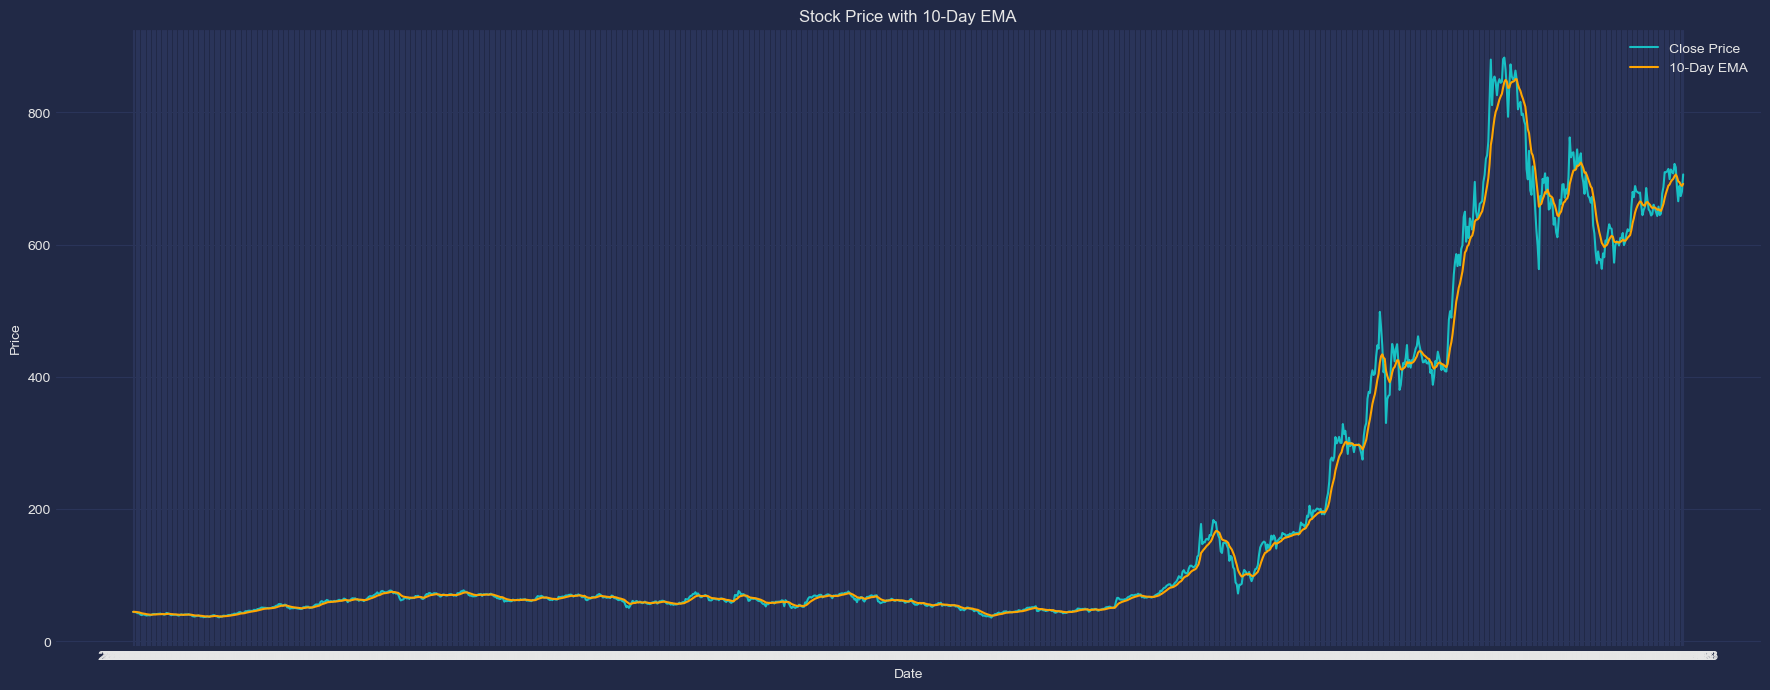

In [92]:
import pandas as pd

def calculate_ema(data, window):
    """
    Calculate Exponential Moving Average (EMA) for a given time series.
    
    Parameters:
        data (pd.Series): The time series data (e.g., stock prices).
        window (int): The period over which to apply the EMA.
    
    Returns:
        pd.Series: The EMA values.
    """
    return data.ewm(span=window, adjust=False).mean()
path = f'./Data/{company}/{company.lower()}.csv'
data = pd.read_csv(path)
data.head()    
import matplotlib.pyplot as plt

# Load your stock data (assuming 'data' contains 'Close' prices)
window = 10  # Example for a 10-day EMA
data['EMA_10'] = calculate_ema(data['Close'], window)

# Plot original Close price and EMA
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['EMA_10'], label='10-Day EMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Stock Price with 10-Day EMA')
plt.show()


In [93]:
# Drop any rows with NaN values caused by EMA calculation at the start
data.dropna(inplace=True)

In [94]:
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'EMA_10']]
data.set_index('Date', inplace=True)


# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Splitting the data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


# Prepare sequences
sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)

In [95]:
# Model_2, Loss, and Optimizer
model_2 = StockPriceLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model_2.parameters(), lr=0.001)

# Training Loop
epochs = 100
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        # Forward pass
        model_2.train()
        optimizer.zero_grad()
        y_pred = model_2(X_batch)
        
        # Compute the loss
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/100, Loss: 0.0026
Epoch 2/100, Loss: 0.0025
Epoch 3/100, Loss: 0.0061
Epoch 4/100, Loss: 0.0050
Epoch 5/100, Loss: 0.0008
Epoch 6/100, Loss: 0.0004
Epoch 7/100, Loss: 0.0002
Epoch 8/100, Loss: 0.0001
Epoch 9/100, Loss: 0.0001
Epoch 10/100, Loss: 0.0001
Epoch 11/100, Loss: 0.0001
Epoch 12/100, Loss: 0.0001
Epoch 13/100, Loss: 0.0001
Epoch 14/100, Loss: 0.0001
Epoch 15/100, Loss: 0.0001
Epoch 16/100, Loss: 0.0001
Epoch 17/100, Loss: 0.0001
Epoch 18/100, Loss: 0.0001
Epoch 19/100, Loss: 0.0001
Epoch 20/100, Loss: 0.0001
Epoch 21/100, Loss: 0.0001
Epoch 22/100, Loss: 0.0001
Epoch 23/100, Loss: 0.0001
Epoch 24/100, Loss: 0.0001
Epoch 25/100, Loss: 0.0001
Epoch 26/100, Loss: 0.0001
Epoch 27/100, Loss: 0.0001
Epoch 28/100, Loss: 0.0000
Epoch 29/100, Loss: 0.0000
Epoch 30/100, Loss: 0.0000
Epoch 31/100, Loss: 0.0001
Epoch 32/100, Loss: 0.0001
Epoch 33/100, Loss: 0.0001
Epoch 34/100, Loss: 0.0001
Epoch 35/100, Loss: 0.0001
Epoch 36/100, Loss: 0.0001
Epoch 37/100, Loss: 0.0001
Epoch 38/1

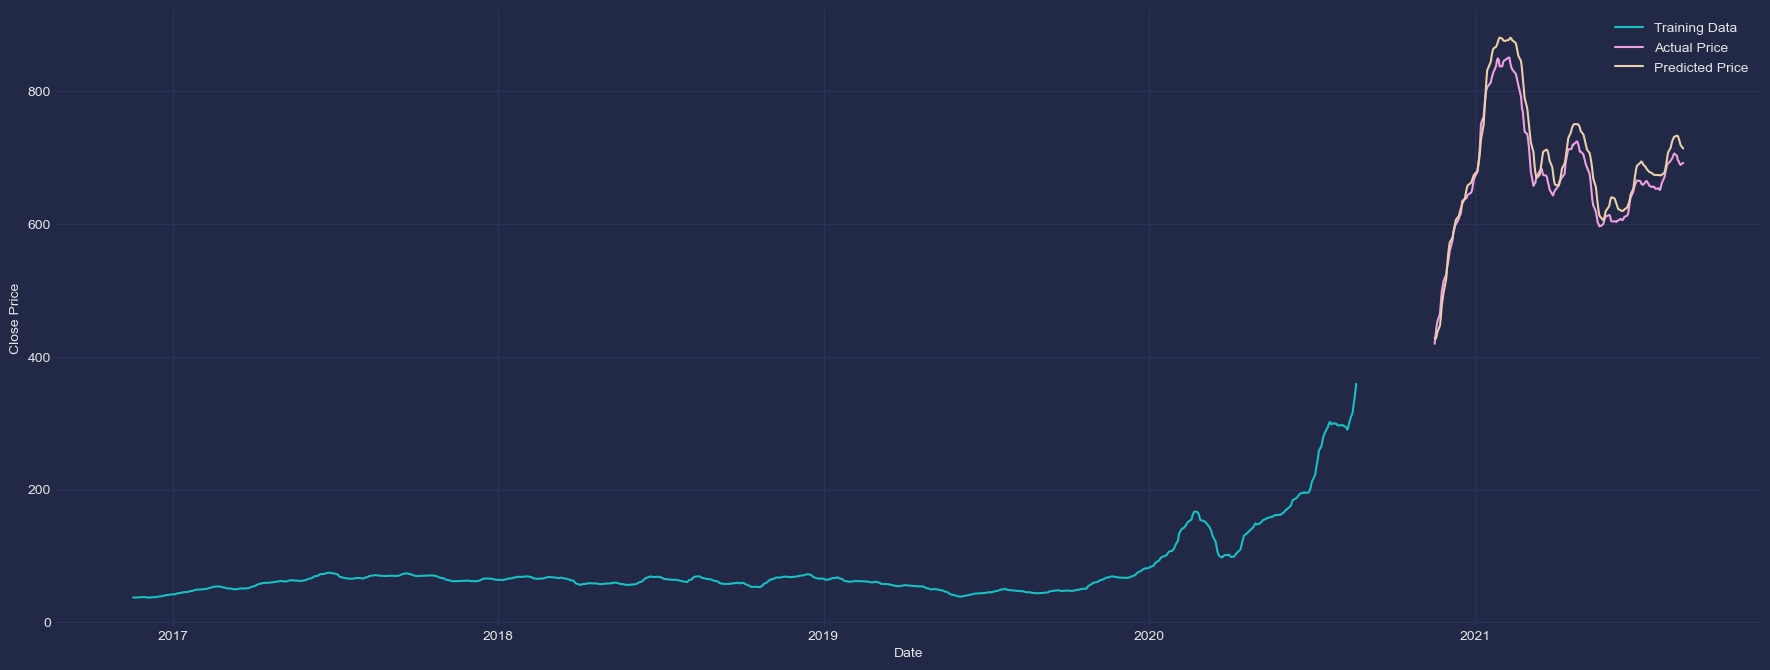

In [96]:
# Evaluate on test data
model_2.eval()
with torch.no_grad():
    predictions = model_2(X_test).detach().numpy()

# Rescale predictions back to original scale
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.unsqueeze(1).numpy())

# Ensure predictions and test data index match
train_plot_index = data.index[sequence_length:train_size]
test_plot_index = data.index[train_size + sequence_length:]

# Plot training data
plt.plot(train_plot_index, scaler.inverse_transform(train_data)[sequence_length:], label='Training Data')

# Plot actual prices
plt.plot(test_plot_index, y_test_rescaled, label='Actual Price',color='#faee')

# Plot predicted prices
plt.plot(test_plot_index, predictions, label='Predicted Price',color='#eacfaa')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [100]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_rescaled, predictions)
print(f"R-squared (R²): {r2:.4f}")


R-squared (R²): 0.9084
